# Split tiles

### prepare input data for GEE

In [1]:
import geopandas as gpd
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
indir = r"F:\acoca\research\gee\dataset\AMZ\geodata\split\384_major\raw\geojson"

df_patchid = gpd.read_file(os.path.join(indir, 'patchid.geojson'))
df_fileid = gpd.read_file(os.path.join(indir, 'fileid.geojson'))
aoi = gpd.read_file(os.path.join(indir, 'amz_raisg.geojson'))

In [3]:
df_all = gpd.overlay(df_patchid,df_fileid,how='intersection')

df_all['id_fn'] = df_all.patch_id.astype(str) + '_' +  df_all.file_id.astype(str)
df_all.crs = {'init' :'epsg:4326'} # or whatever

C:\Users\PAPAZ\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\geopandas\tools\overlay.py:139: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  cand = df1.ix[cand_id]
C:\Users\PAPAZ\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\geopandas\tools\overlay.py:145: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  cand = df2.ix[cand_id]


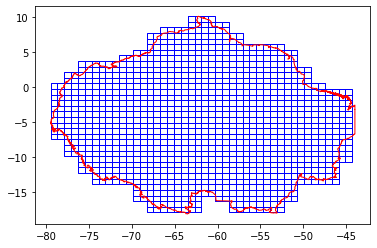

In [4]:
fig, ax = plt.subplots()
df_all.plot(ax=ax, facecolor='none', edgecolor='blue')
aoi.plot(ax=ax, facecolor='none', edgecolor='red')

In [6]:
df_all.to_file(r'F:\acoca\research\gee\dataset\AMZ\geodata\split\384\raw\geojson\merge_all.geojson', driver='GeoJSON')

In [7]:
outdir = r"F:\acoca\research\gee\dataset\AMZ\geodata\split\384\final\tileids"
if not os.path.exists(outdir):
    os.makedirs(outdir)
        
np.savetxt(os.path.join(outdir,"pred.tileids"), np.array(df_all.id_fn).astype(str),fmt='%s')

In [8]:
outdir = r"F:\acoca\research\gee\dataset\AMZ\geodata\split\384\combined"
if not os.path.exists(outdir):
    os.makedirs(outdir)
        
np.savetxt(os.path.join(outdir,"aoi.tileids"), np.array(df_all.file_id.unique()).astype(str),fmt='%s')

In [6]:
allfiles = list(range(0,770))
files_remove = list(set(allfiles).difference(df_all.file_id.unique().tolist()))

In [11]:
rootdir = r'F:\acoca\research\gee\dataset\AMZ\combine\384'

recursive_remove = [os.path.join(rootdir,'data15','AMZ_p384k0-{}.gz'.format(i)) for i in files_remove]

[os.remove(x) for x in recursive_remove[1:]]

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'F:\\acoca\\research\\gee\\dataset\\AMZ\\combine\\384\\data15\\AMZ_p384k0-1.gz'

In [2]:
df_patchid = gpd.read_file(r'F:\acoca\research\gee\dataset\AMZ\geodata\split\384\raw\geojson\merge_all.geojson')

In [3]:
import pygeoj

geojson = pygeoj.load(df_patchid)

#     x_all = []
#     y_all = []
#     id_all = []

#     for feature in geojson:
#         print(feature)
#         x = feature.geometry.bbox[0]
#         y = feature.geometry.bbox[-1]
#         id_n = feature.properties['id_fn']
#         x_all.append(x)
#         y_all.append(y)
#         id_all.append(id_n)

ValueError: The truth value of a GeoDataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

##buffer

In [55]:
aoi_buff = aoi.buffer(-1)

In [56]:
aoi_buffgeo = gpd.GeoDataFrame(geometry=gpd.GeoSeries(aoi_buff))
envgdf.crs = {'init' :'epsg:4326'} # or whatever
sjo = gpd.sjoin(df_all, envgdf, how='inner',op='intersects')

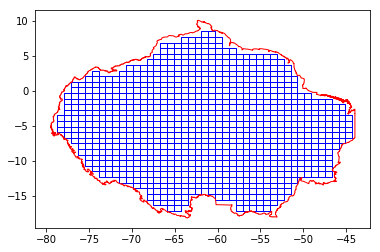

In [57]:
fig, ax = plt.subplots()
sjo.plot(ax=ax, facecolor='none', edgecolor='blue')
aoi.plot(ax=ax, facecolor='none', edgecolor='red')

In [58]:
sjo.to_file(r'F:\acoca\research\gee\dataset\AMZ\geodata\split\384\raw\geojson\merge.shp')

In [13]:
indir = r"F:\acoca\research\gee\dataset\tl_bogota\geodata\split\384\raw\geojson"

df_patchid = gpd.read_file(os.path.join(indir, 'merge_all.shp'))

df_patchid.to_file(os.path.join(indir, 'merge_all.geojson'), driver='GeoJSON')

### split from merge

In [76]:
from sklearn.model_selection import train_test_split
import geopandas as gpd

In [79]:
indir = r"F:\acoca\research\gee\dataset\AMZ\geodata\split\384\raw\tileid"

df_tileid = gpd.read_file(os.path.join(indir, 'tileid.geojson'))

In [80]:
train_all, eval_data = train_test_split(df_tileid['id_fn'], test_size = 1/6,  random_state=42)

outdir = r"F:\acoca\research\gee\dataset\AMZ\geodata\split\384\final\tileids"
if not os.path.exists(outdir):
    os.makedirs(outdir)
        
np.savetxt(os.path.join(outdir,"eval.tileids"), np.array(eval_data).astype(str),fmt='%s')

In [81]:
##train and test
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=10, test_size=1/5,  random_state=42)
i = 0
for train_index, test_index in rs.split(train_all):
    i = i + 1
    train_all = np.array(train_all)
    train_data = train_all[train_index]
    test_data = train_all[test_index]
    np.savetxt(os.path.join(outdir,"train_fold" + str(i-1) + ".tileids"), np.array(train_data).astype(str),fmt='%s')
    np.savetxt(os.path.join(outdir,"test_fold" + str(i-1) + ".tileids"), np.array(test_data).astype(str),fmt='%s')

### check split

In [84]:
import numpy as np
import os
from collections import Counter
import pandas as pd
indir = r"F:\acoca\research\gee\dataset\AMZ\geodata\split\384\final\tileids"

traintiles = np.loadtxt(os.path.join(indir,"train_fold0.tileids"), dtype='str')
testtiles = np.loadtxt(os.path.join(indir,"test_fold0.tileids"), dtype='str')
evaltiles = np.loadtxt(os.path.join(indir,"eval.tileids"), dtype='str')

In [41]:
filesnm = []
for root, dirs, files in os.walk(r"F:\acoca\research\gee\dataset\test2\gz\8\MCD12Q1v6\data09"):  
    for name in files:        
        if name.endswith(".gz"):  
            # shapefile name without extension  
            fname, ext = name.split('.')
            filesnm.append(fname)

In [43]:
filesnm_df = pd.DataFrame(filesnm)

In [44]:
names = {0:'file',1:'id_fn'}

filesnm_df = filesnm_df.iloc[:,0].str.split('_', 1, expand=True).rename(columns = names)
filesnm_df['file_nm'] = filesnm_df['file'].astype(str) + '_' + filesnm_df['id_fn'].astype(str)

In [46]:
outdir = r"F:\acoca\research\gee\dataset\test2\gz\8\MCD12Q1v6\tileids"
if not os.path.exists(outdir):
    os.makedirs(outdir)

np.savetxt(os.path.join(outdir,"train_fold" + str(0) + ".tileids"), np.array(filesnm_df.loc[filesnm_df['id_fn'].isin(traintiles),'file_nm']).astype(str),fmt='%s')
np.savetxt(os.path.join(outdir,"test_fold" + str(0) + ".tileids"), np.array(filesnm_df.loc[filesnm_df['id_fn'].isin(testtiles),'file_nm']).astype(str),fmt='%s')
np.savetxt(os.path.join(outdir,"eval.tileids"), np.array(filesnm_df.loc[filesnm_df['id_fn'].isin(evaltiles),'file_nm']).astype(str),fmt='%s')

In [47]:
print('Total files = ', filesnm_df.loc[filesnm_df['id_fn'].isin(np.concatenate([traintiles,testtiles,evaltiles])),'file_nm'].shape)

Total files =  (2304,)


In [48]:
evaltiles.shape

(48,)

In [37]:
df_all.loc[df_all['id_fn'].isin(traintiles),'split'] = 0
df_all.loc[df_all['id_fn'].isin(testtiles),'split'] = 1
df_all.loc[df_all['id_fn'].isin(evaltiles),'split'] = 2

In [40]:
df_all.to_file(driver = 'ESRI Shapefile', filename= os.path.join(indir,"split.shp"))

In [15]:
df_all.to_file(driver="GeoJSON",filename= os.path.join(r'F:\acoca\research\gee\dataset\test\MOD09_250m500m\geodata\blocks\384','split.geojson'))

In [87]:
import numpy as np
import os
from collections import Counter
import pandas as pd
indir = r"F:\acoca\research\gee\dataset\AMZ\gz\24\multiple\tileids"

traintiles = np.loadtxt(os.path.join(indir,"train_fold1.tileids"), dtype='str')
testtiles = np.loadtxt(os.path.join(indir,"test_fold1.tileids"), dtype='str')
evaltiles = np.loadtxt(os.path.join(indir,"eval.tileids"), dtype='str')

In [86]:
print(len(traintiles), len(testtiles))

36608 9984


In [88]:
print(len(traintiles), len(testtiles))

37376 9216


In [1]:
## temp

In [2]:
import geopandas as gpd
import os 
import numpy as np
import pandas as pd

In [3]:
indir = r"F:\acoca\research\gee\dataset\AMZ\geodata\split\384\final\geojson"

fold0 = gpd.read_file(os.path.join(indir, 'fold0.geojson'))

In [6]:
fold0.to_file(driver = 'ESRI Shapefile', filename= os.path.join(indir,"fold0.shp"))

# create config

In [49]:
import configparser

In [50]:
config2 = configparser.ConfigParser()
config2['2009'] = {'pix250': '384',
                   'nbands250': '2',
                   'nbands500': '5',
                   'nobs': '46',
                   'datadir': 'data09',
                   'sqlwhere': '"where date is not null and year=2001"',
                   'tiletable': 'tiles23',
                   'fieldtable': 'fields2009',
                   'level': 'L1C'}

In [51]:
with open(r'F:\acoca\research\gee\dataset\paper\MOD09_250m500m\gz\384\MCD12Q1v6\dataset.ini', 'w') as configfile:
    config2.write(configfile)

# create geotransform

In [52]:
import os
import pandas as pd
filesnm = []
for root, dirs, files in os.walk(r"F:\acoca\research\gee\dataset\paper\MOD09_250m500m\gz\384\MCD12Q1v6\data09"):  
    for name in files:        
        if name.endswith(".gz"):  
            # shapefile name without extension  
            fname, ext = name.split('.')
            filesnm.append(fname)

In [53]:
col_1 = pd.DataFrame(filesnm)

In [54]:
col_1['1'] = 0
col_1['2'] = 250
col_1['3'] = 0
col_1['4'] = 0
col_1['5'] = 0
col_1['6'] = -250
col_1['7'] = 32632

In [55]:
col_1.to_csv(r"F:\acoca\research\gee\dataset\paper\MOD09_250m500m\gz\384\MCD12Q1v6\geotransforms.csv", index= None, header = None)

# split tiles 250m data

In [13]:
import geopandas as gpd
import os 
import numpy as np
import pandas as pd

indir = r"F:\acoca\research\gee\dataset\final\geodata\ids\p207_250m\final"

df_split = gpd.read_file(os.path.join(indir, 'AMZ_p207k0_250m.geojson'))

In [14]:
filesnm = []
for root, dirs, files in os.walk(r"F:\acoca\research\gee\dataset\final\MOD13Q1_250m\gz\69\MCD12Q1v6\data09"):  
    for name in files:        
        if name.endswith(".gz"):  
            # shapefile name without extension  
            fname, ext = name.split('.')
            filesnm.append(fname)

In [15]:
filesnm_df = pd.DataFrame(filesnm)
names = {0:'file',1:'id_fn'}

filesnm_df = filesnm_df.iloc[:,0].str.split('_', 1, expand=True).rename(columns = names)
filesnm_df['file_nm'] = filesnm_df['file'].astype(str) + '_' + filesnm_df['id_fn'].astype(str)

In [16]:
outdir = r"F:\acoca\research\gee\dataset\final\MOD13Q1_250m\gz\69\MCD12Q1v6\tileids"
if not os.path.exists(outdir):
    os.makedirs(outdir)

np.savetxt(os.path.join(outdir,"train_fold" + str(0) + ".tileids"), np.array(filesnm_df.loc[filesnm_df['id_fn'].isin(np.array(df_split[df_split.split == 0].id_fn)),'file_nm']).astype(str),fmt='%s')
np.savetxt(os.path.join(outdir,"test_fold" + str(0) + ".tileids"), np.array(filesnm_df.loc[filesnm_df['id_fn'].isin(np.array(df_split[df_split.split == 1].id_fn)),'file_nm']).astype(str),fmt='%s')
np.savetxt(os.path.join(outdir,"eval.tileids"), np.array(filesnm_df.loc[filesnm_df['id_fn'].isin(np.array(df_split[df_split.split == 2].id_fn)),'file_nm']).astype(str),fmt='%s')

In [17]:
np.array(filesnm_df.loc[filesnm_df['id_fn'].isin(np.array(df_split[df_split.split == 2].id_fn)),'file_nm']).shape

(1170,)

In [8]:
import tensorflow as tf

In [6]:
import glob, os

In [11]:
options = tf.python_io.TFRecordOptions(tf.python_io.TFRecordCompressionType.GZIP)

fileNames_250m = sorted(glob.glob(r'F:\acoca\research\gee\dataset\final\MOD09_250m500m\raw\192\data09\*.gz'),key=os.path.getmtime)
fileNames_500m = sorted(glob.glob(r'F:\acoca\research\gee\dataset\final\MOD09_250m500m\raw\96\data09\*.gz'),key=os.path.getmtime)

n_patches_first = sum(1 for _ in tf.python_io.tf_record_iterator(fileNames_250m[0], options=options))
n_patches_last = sum(1 for _ in tf.python_io.tf_record_iterator(fileNames_250m[-1], options=options))

batchsize_merge = n_patches_first

tfiles_250m = (n_patches_first * (len(fileNames_250m)-1)) + n_patches_last

n_patches_first = sum(1 for _ in tf.python_io.tf_record_iterator(fileNames_500m[0], options=options))
n_patches_last = sum(1 for _ in tf.python_io.tf_record_iterator(fileNames_500m[-1], options=options))

tfiles_500m = (n_patches_first * (len(fileNames_500m)-1)) + n_patches_last

print(tfiles_250m, tfiles_500m)

3978 3978
